# Introduction
This is a notebook where I will create a svm classifier for the MNIST dataset

In [1]:
from sklearn.datasets import fetch_openml
import pandas
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

from matplotlib import pyplot
import numpy as np
from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import accuracy_score

# EDA

In [2]:
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Given the fact that the first image in X is a Series object, we will have to first convert it into a 2D Numpy array then reshape to 28x28 before we can visualize it 

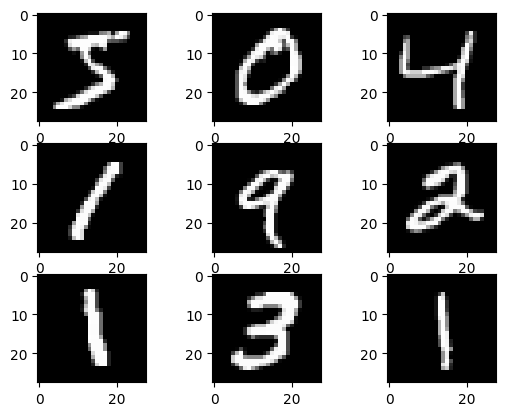

In [3]:
# visualize da data
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(
        X_train.iloc[i].to_numpy().reshape(28, 28), cmap=pyplot.get_cmap("gray")
    )
pyplot.show()

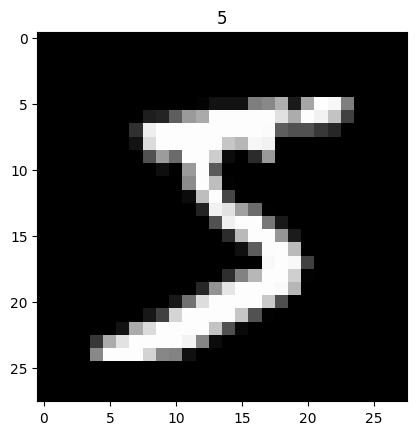

In [4]:
pyplot.title(y_train[0])
pyplot.imshow(X_train.iloc[0].to_numpy().reshape(28, 28), cmap=pyplot.get_cmap("gray"))

In [5]:
# check for any missing values
print(
    "There are missing values"
    if np.any(X_train is False)
    else "There are no missing values"
)

There are no missing values


# Model 
We will be using a OneVersusRest approach where a classifier will be trained for each number so for example 0 vs {1,2,3,4,.... 10} then 1 vs {0,2,3,4,5,.... 10} and so on. 

In [6]:
# Create an SVC classifier with OvR strategy
ovr_classifier = OneVsRestClassifier(SVC())

# Fit the classifier on the training data
ovr_classifier.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [7]:
# carry out predictions on the test data
y_pred = ovr_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

In [8]:
accuracy

0.98

In [9]:
# get validation sets to fine tune the hyper params (speed up the process)
# splitting test set into test and val sets

X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42
)

In [10]:
# grid search to fine tune the svm classifier using the val set
# Define the parameter grid for tuning
param_grid = {"estimator__C": [0.1, 1, 10], "estimator__kernel": ["linear", "rbf"]}

# Perform Grid Search with Cross-Validation on the training set
grid_search = GridSearchCV(ovr_classifier, param_grid, cv=3)
grid_search.fit(X_val, y_val)

GridSearchCV(cv=3, estimator=OneVsRestClassifier(estimator=SVC()),
             param_grid={'estimator__C': [0.1, 1, 10],
                         'estimator__kernel': ['linear', 'rbf']})

In [11]:
# check accuracy
acc_grid = grid_search.score(X_test, y_test)
acc_grid

0.9616

Achieved accuracy of 96% via the GridSearch Method. 

The drop in accuracy by 1% may be due to the fact that we trained the grid search only on the validation sets. We are going to create a new grid search which will be trained on the entire training set.

In [12]:
# grid search on training set
# Define the parameter grid for tuning
# param_grid = {"estimator__C": [0.1, 1], "estimator__kernel": ["linear", "rbf"]}

# # Perform Grid Search with Cross-Validation on the training set
# grid_search_v2 = GridSearchCV(ovr_classifier, param_grid, cv=3)
# grid_search_v2.fit(X_train, y_train)

Well we are unable to get a result as the fitting has exceeded 300 mins so we can conclude that the tradeoff for a bit more accuracy is around 290 + more mins which is just not worth it and so we stick with the model we obtained using grid search on a smaller validation set. 